# 🏡 Texas Airbnb Market Analysis – Austin Edition
Exploratory Data Analysis (EDA) of Airbnb listings in Austin, Texas.

**Objective:** Build foundational skills in data visualization and probability using a familiar domain. This project explores price distributions, occupancy patterns, and neighborhood trends using the Inside Airbnb dataset.

**Skills practiced:**
- Data loading & cleaning (Pandas)
- Exploratory data visualization (Matplotlib / Seaborn)
- Probability & descriptive statistics
- Insight communication


In [1]:
# ─── Imports ─────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.1)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# ─── Load Dataset ─────────────────────────────────────────────────
file_path = '../data/raw/listings.csv'
df = pd.read_csv(file_path, low_memory=False)
print('Shape:', df.shape)
df.head(3)

Shape: (15187, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65


In [3]:
# ─── Initial Data Overview ─────────────────────────────────────────
df.info()
df.describe(include='all').T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15187.0,NaN,NaN,NaN,599524500272389120.0,552027769480232512.0,5456.0,32154255.5,697316005746793984.0,1128969870717137664.0,1441660813139987456.0
listing_url,15187,15187,https://www.airbnb.com/rooms/5456,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,15187.0,NaN,NaN,NaN,20250613040112.996094,7.531498,20250613040113.0,20250613040113.0,20250613040113.0,20250613040113.0,20250613040113.0
last_scraped,15187,2,2025-06-13,9703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,15187,2,city scrape,10718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,15187,14826,Wyndham Austin Resort|1BR/1BA King Bed w/ Gym&...,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,14840,13245,Please click on -show more- and read the descr...,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,7914,6332,"• CW Austin Resort is in Austin, Texas.",115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,15186,14750,https://a0.muscache.com/pictures/miso/Hosting-...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,15187.0,NaN,NaN,NaN,181790758.820043,200863059.283045,23.0,18493210.0,84767145.0,332708089.5,700650145.0


## 🔍 Step 1: Data Cleaning
- Inspect missing values.
- Keep relevant columns for analysis.
- Convert price fields to numeric.


In [4]:
# Check for missing values
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
license                         1.000000
neighbourhood                   0.478896
neighborhood_overview           0.478896
host_about                      0.384276
beds                            0.295713
estimated_revenue_l365d         0.294923
price                           0.294923
bathrooms                       0.294528
host_response_rate              0.284388
host_response_time              0.284388
host_acceptance_rate            0.230394
review_scores_value             0.191809
review_scores_location          0.191809
review_scores_checkin           0.191743
review_scores_rating            0.191677
first_review                    0.191677
review_scores_communication     0.191677
review_scores_cleanliness       0.191677
dtype: float64

In [5]:
# Select subset of relevant columns
cols = ['id','name','neighbourhood_cleansed','room_type','price','minimum_nights','number_of_reviews','availability_365','review_scores_rating']
df_sub = df[cols].copy()

# Clean price column
df_sub['price'] = df_sub['price'].replace({'\$':'',',':''}, regex=True).astype(float)
df_sub.head()

,id,name,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,availability_365,review_scores_rating
0,5456,"Walk to 6th, Rainey St and Convention Ctr",78702,Entire home/apt,101.0,2,711,336,4.85
1,5769,NW Austin Room,78729,Private room,45.0,1,304,4,4.91
2,6413,Gem of a Studio near Downtown,78704,Entire home/apt,NaN,30,123,0,4.98
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",78704,Entire home/apt,155.0,3,338,312,4.97
4,8502,Woodland Studio Lodging,78741,Entire home/apt,43.0,4,54,98,4.57


## 📊 Step 2: Visualization — Price Distribution
Goal: Understand price range and outliers.


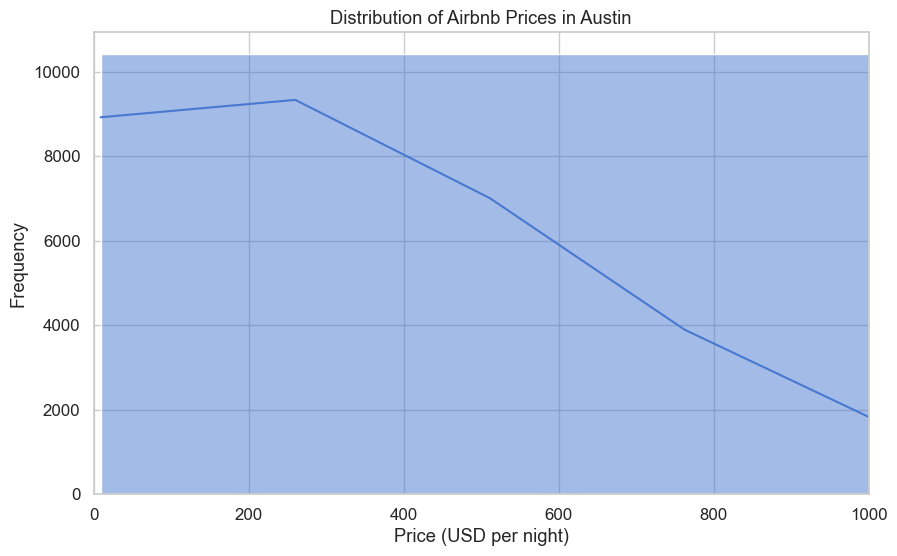

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df_sub['price'], bins=50, kde=True)
plt.xlim(0, 1000)
plt.title('Distribution of Airbnb Prices in Austin')
plt.xlabel('Price (USD per night)')
plt.ylabel('Frequency')
plt.show()

## 🏙️ Step 3: Neighborhood Analysis
Goal: Compare median price by neighborhood.


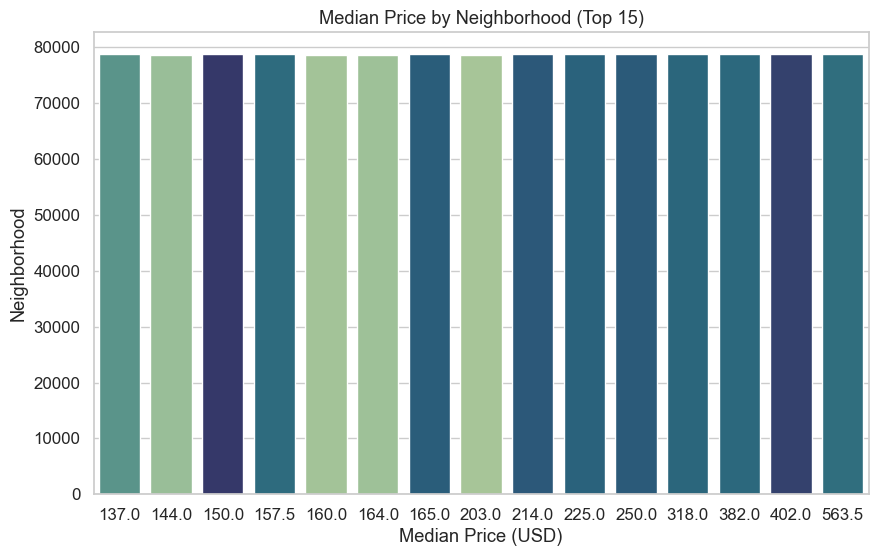

In [7]:
neigh_prices = df_sub.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=neigh_prices.values, y=neigh_prices.index, hue=neigh_prices.index, palette='crest', legend=False)
plt.title('Median Price by Neighborhood (Top 15)')
plt.xlabel('Median Price (USD)')
plt.ylabel('Neighborhood')
plt.show()

## 🎲 Step 4: Probability & Statistics
Goal: Build intuition using sample means and variance.


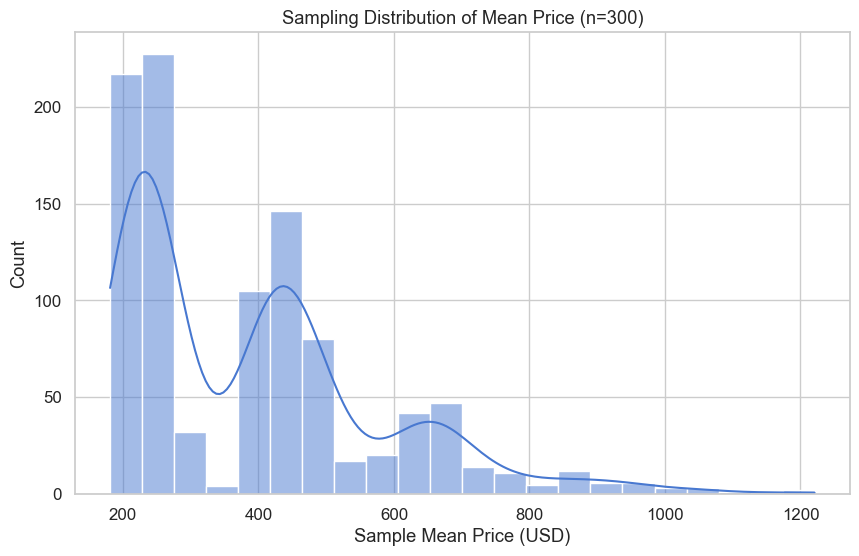

(np.float64(390.23585406844836), np.float64(187.84058597586642))

In [8]:
# Example: Sampling mean price distribution
sample_means = [df_sub['price'].sample(300, random_state=i).mean() for i in range(1000)]
sns.histplot(sample_means, kde=True)
plt.title('Sampling Distribution of Mean Price (n=300)')
plt.xlabel('Sample Mean Price (USD)')
plt.show()

np.mean(sample_means), np.std(sample_means)

In [9]:
df_sub.head()

,id,name,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,availability_365,review_scores_rating
0,5456,"Walk to 6th, Rainey St and Convention Ctr",78702,Entire home/apt,101.0,2,711,336,4.85
1,5769,NW Austin Room,78729,Private room,45.0,1,304,4,4.91
2,6413,Gem of a Studio near Downtown,78704,Entire home/apt,NaN,30,123,0,4.98
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",78704,Entire home/apt,155.0,3,338,312,4.97
4,8502,Woodland Studio Lodging,78741,Entire home/apt,43.0,4,54,98,4.57


### Price vs Review Scores Rating → “Do better-reviewed listings charge more?”

In [10]:
# Convert to numeric and drop rows where either is missing
df_scatter = df_sub.copy()
df_scatter['review_scores_rating'] = pd.to_numeric(df_scatter['review_scores_rating'], errors='coerce')
df_scatter['price'] = pd.to_numeric(df_scatter['price'], errors='coerce')

df_scatter = df_scatter.dropna(subset=['price', 'review_scores_rating'])
print(df_scatter.shape)

(9195, 9)


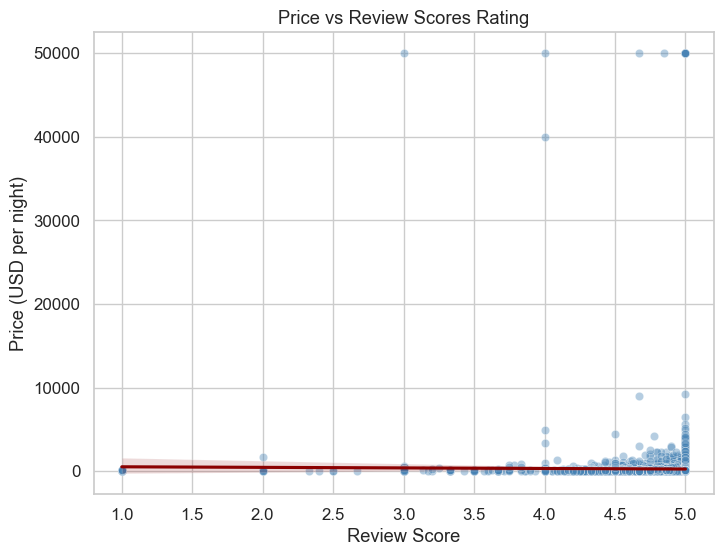

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_scatter,
    x='review_scores_rating',
    y='price',
    alpha=0.4,
    color='steelblue'
)
sns.regplot(
    data=df_scatter,
    x='review_scores_rating',
    y='price',
    scatter=False,
    color='darkred'
)
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Score')
plt.ylabel('Price (USD per night)')
plt.show()

### Availability 365 vs Price → “Are expensive listings booked more or less often?”

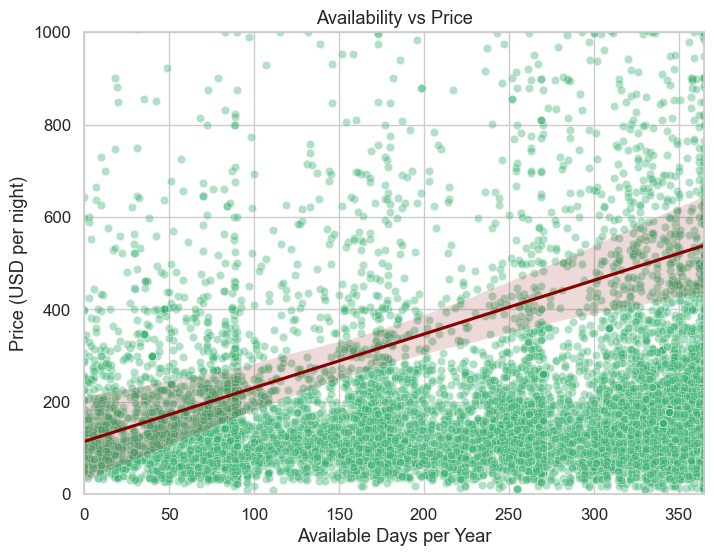

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_sub,
    x='availability_365',
    y='price',
    alpha=0.4,
    color='mediumseagreen'
)
sns.regplot(
    data=df_sub,
    x='availability_365',
    y='price',
    scatter=False,
    color='darkred'
)
plt.title('Availability vs Price')
plt.xlabel('Available Days per Year')
plt.ylabel('Price (USD per night)')
plt.xlim(0,365)
plt.ylim(0,1000)
plt.show()

### Interpretation ideas
	•	A downward slope → more expensive listings get booked more (lower availability).
	•	An upward slope → pricier listings sit empty longer.

In [13]:
import numpy as np
import scipy.stats as stats

mean_price = df_scatter['price'].mean()
std_price  = df_scatter['price'].std()
n          = len(df_scatter['price'])
mean_price, std_price, n

(np.float64(283.05448613376836), 1803.44659964605, 9195)

In [14]:
confidence = 0.95
stderr = std_price / np.sqrt(n)
margin_of_error = stats.t.ppf((1 + confidence) / 2, n - 1) * stderr
lower_bound = mean_price - margin_of_error
upper_bound = mean_price + margin_of_error

print(f"Expected nightly rate (mean): ${mean_price:,.2f}")
print(f"95% Confidence Interval: ${lower_bound:,.2f}  →  ${upper_bound:,.2f}")

Expected nightly rate (mean): $283.05
95% Confidence Interval: $246.19  →  $319.92


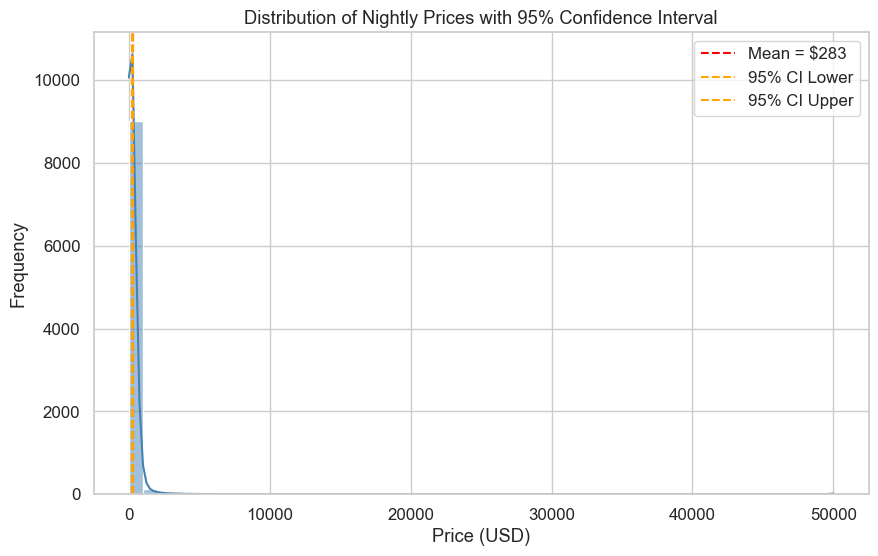

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df_scatter['price'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_price, color='red', linestyle='--', label=f"Mean = ${mean_price:,.0f}")
plt.axvline(lower_bound, color='orange', linestyle='--', label='95% CI Lower')
plt.axvline(upper_bound, color='orange', linestyle='--', label='95% CI Upper')
plt.title('Distribution of Nightly Prices with 95% Confidence Interval')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

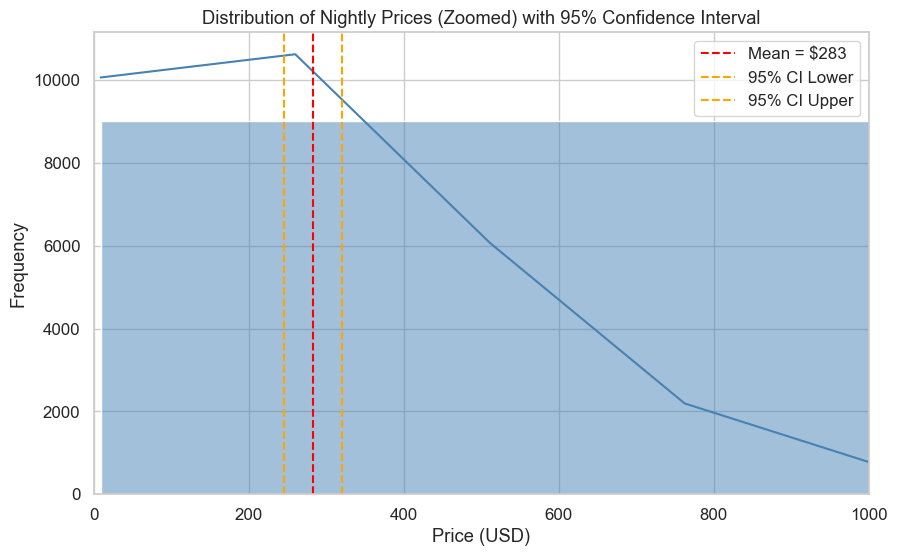

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df_scatter['price'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_price, color='red', linestyle='--', label=f"Mean = ${mean_price:,.0f}")
plt.axvline(lower_bound, color='orange', linestyle='--', label='95% CI Lower')
plt.axvline(upper_bound, color='orange', linestyle='--', label='95% CI Upper')
plt.title('Distribution of Nightly Prices (Zoomed) with 95% Confidence Interval')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)     # 🔹 Zoom to typical price range
plt.legend()
plt.show()

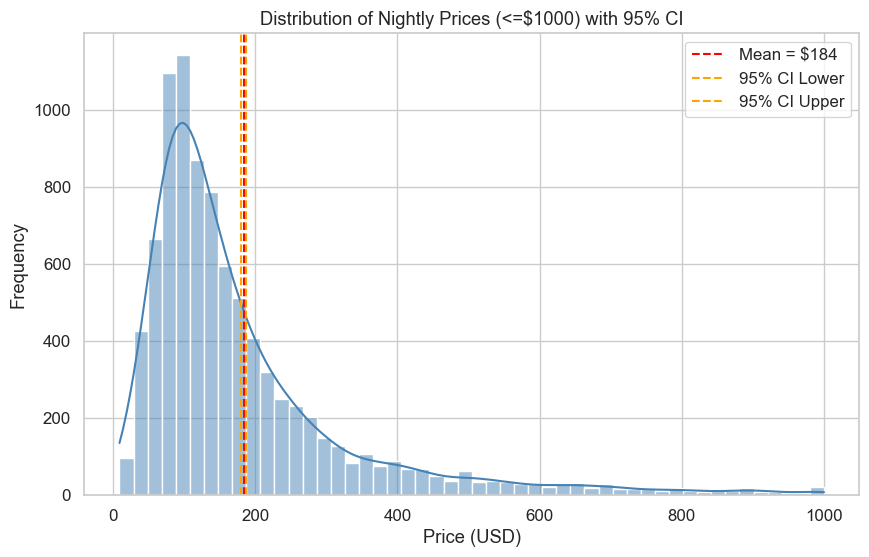

In [17]:
df_filtered = df_scatter[df_scatter['price'] <= 1000]

mean_price_f = df_filtered['price'].mean()
std_price_f  = df_filtered['price'].std()
n_f          = len(df_filtered)
stderr_f     = std_price_f / np.sqrt(n_f)
margin_f     = stats.t.ppf(0.975, n_f - 1) * stderr_f
lower_f, upper_f = mean_price_f - margin_f, mean_price_f + margin_f

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['price'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_price_f, color='red', linestyle='--', label=f"Mean = ${mean_price_f:,.0f}")
plt.axvline(lower_f, color='orange', linestyle='--', label='95% CI Lower')
plt.axvline(upper_f, color='orange', linestyle='--', label='95% CI Upper')
plt.title('Distribution of Nightly Prices (<=$1000) with 95% CI')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Understanding Price Distribution and Outliers
    - The mean changed quite a bit, so I'm doing a quick sanity check

In [18]:
import numpy as np
import pandas as pd
from scipy import stats

# How many outliers did we remove?
prop_removed = 1 - (len(df_filtered) / len(df_scatter))

summary_before = df_scatter['price'].describe(percentiles=[.5,.9,.95,.99])
summary_after  = df_filtered['price'].describe(percentiles=[.5,.9,.95,.99])

mean_before   = df_scatter['price'].mean()
median_before = df_scatter['price'].median()
mean_after    = df_filtered['price'].mean()
median_after  = df_filtered['price'].median()

trim5_before = stats.trim_mean(df_scatter['price'], 0.05)  # 5% trimmed mean
trim5_after  = stats.trim_mean(df_filtered['price'], 0.05)

prop_removed, summary_before, summary_after, (mean_before, median_before, trim5_before), (mean_after, median_after, trim5_after)

(0.02066340402392608,
 count     9195.000000
 mean       283.054486
 std       1803.446600
 min          9.000000
 50%        135.000000
 90%        416.000000
 95%        644.000000
 99%       1671.080000
 max      50000.000000
 Name: price, dtype: float64,
 count    9005.000000
 mean      183.766907
 std       158.248861
 min         9.000000
 50%       132.000000
 90%       376.000000
 95%       524.800000
 99%       847.920000
 max      1000.000000
 Name: price, dtype: float64,
 (np.float64(283.05448613376836), 135.0, np.float64(172.2239942007974)),
 (np.float64(183.76690727373682), 132.0, np.float64(162.97618753855645)))

### Understanding the Mean Shift After Filtering

Only about **2 % of listings** were priced above \$1 000, yet those extreme values had a huge effect on the average.

| Metric | Before | After (≤ $1000) |
|:--|:--|:--|
| Mean | \$283 | \$184 |
| Median | \$135 | \$132 |
| 5 % Trimmed Mean | \$172 | \$163 |
| Std Dev | \$1 803 | \$158 |

The **median** and **trimmed mean** changed very little, confirming that the underlying market is stable; the **mean** dropped sharply because it had been inflated by a small number of ultra-luxury listings.  

In skewed markets like this, reporting **median** and **trimmed mean** provides a clearer picture of typical pricing than the raw mean.

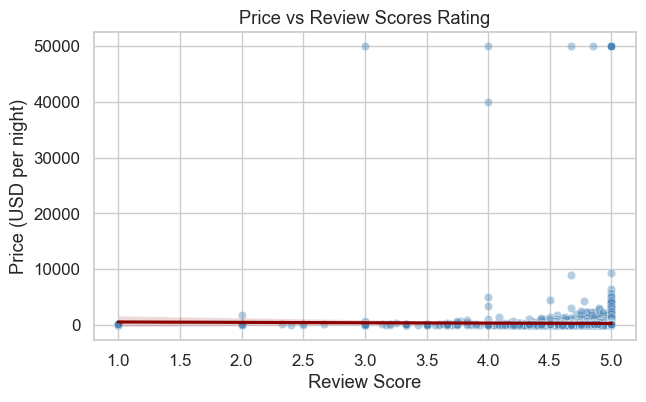

In [24]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# ensure folder exists (safe even if it already does)
visuals_path = Path("../visuals")
visuals_path.mkdir(parents=True, exist_ok=True)

# re-generate the plot
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_scatter, x='review_scores_rating', y='price', alpha=0.4, color='steelblue')
sns.regplot(data=df_scatter, x='review_scores_rating', y='price', scatter=False, color='darkred')
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Score')
plt.ylabel('Price (USD per night)')

# SAVE BEFORE show()
plt.savefig(visuals_path / "price_vs_review_scores.png", bbox_inches='tight', dpi=150)
plt.show()

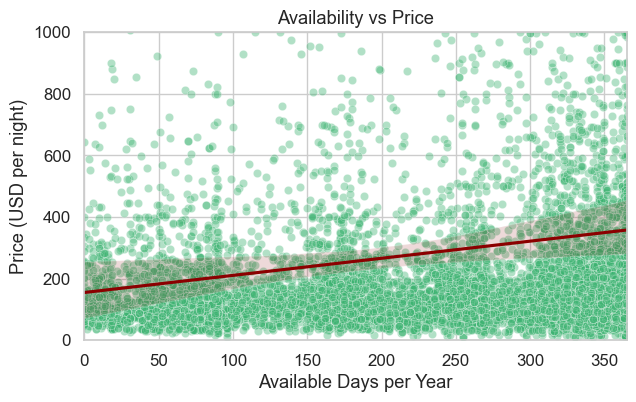

In [23]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df_scatter,
    x='availability_365',
    y='price',
    alpha=0.4,
    color='mediumseagreen'
)
sns.regplot(
    data=df_scatter,
    x='availability_365',
    y='price',
    scatter=False,
    color='darkred'
)
plt.title('Availability vs Price')
plt.xlabel('Available Days per Year')
plt.ylabel('Price (USD per night)')
plt.xlim(0,365)
plt.ylim(0,1000)

# Save *before* showing the plot
plt.savefig("../visuals/availability_vs_price.png", bbox_inches='tight', dpi=150)
plt.show()

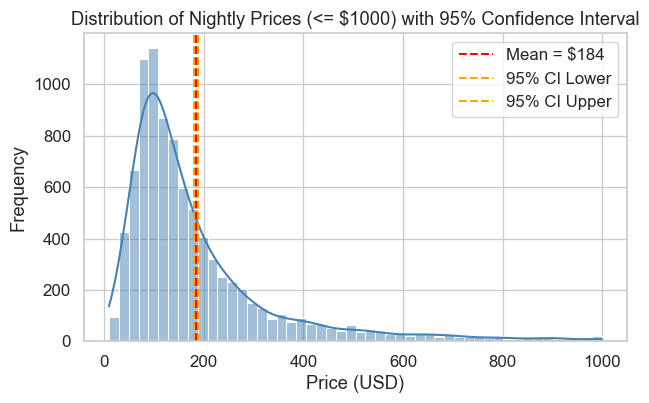

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(df_filtered['price'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_price_f, color='red', linestyle='--', label=f"Mean = ${mean_price_f:,.0f}")
plt.axvline(lower_f, color='orange', linestyle='--', label='95% CI Lower')
plt.axvline(upper_f, color='orange', linestyle='--', label='95% CI Upper')
plt.title('Distribution of Nightly Prices (<= $1000) with 95% Confidence Interval')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()

# Save *before* show()
plt.savefig("../visuals/price_distribution_CI_filtered.png", bbox_inches='tight', dpi=150)
plt.show()

## Final Summary – Week 3: Austin Airbnb Market Analysis

This exploratory analysis built on previous visualization and probability lessons, focusing on how pricing patterns reveal underlying market dynamics in Austin’s Airbnb listings.

**Key insights:**
- **Price vs Rating:** No strong linear relationship. High ratings do not guarantee higher prices; many mid-priced listings maintain excellent scores, suggesting service quality is less tied to nightly cost.
- **Availability vs Price:** A slight negative trend indicates that higher-priced listings tend to be booked fewer days per year—likely due to a smaller target audience and premium positioning.
- **Distribution & Confidence Intervals:** The mean nightly price across all listings was highly skewed by luxury outliers.  
  After filtering to prices ≤ \$1,000, the mean stabilized around **\$184**, aligning closely with the median (\$132).  
  This confirms that **median and trimmed mean** are better indicators of the “typical” Austin listing price than the raw average.
- **Market takeaway:** Austin’s Airbnb market exhibits a healthy mid-range cluster around \$150–\$200 per night, with rare but extreme high-end properties driving skewness.

**Skills demonstrated:**
- Data cleaning and transformation with **Pandas**
- Visualization using **Matplotlib** and **Seaborn**
- Probability concepts and **confidence interval estimation**
- Clear statistical storytelling through markdown commentary

This concludes the Week 3 project in the Month 1 learning phase — reinforcing the link between statistical reasoning, visualization clarity, and insight communication.